
<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 



## Загружаем иканам на свой лэптоп!

Подгружаем свой id, ключ доступа и все нужные нам пакеты. Пишем функцию для выкачивания инфомрации из контактика.

In [1]:
token= "67652540496409e4d1c74dafa4f99a44311577b336d98005e3785bdfe07bc56faf3216bdb36107e57c55a"
myid = "6045249"

# Подгружаем уже знакомую нам библиотеку для запросов
import requests

def Vk_downloader(method,parameters,token = token):
    url = 'https://api.vk.com/method/'+method+'?'+parameters+'&access_token='+str(token)
    response = requests.get(url) 
    return(response.json())

In [2]:
# Проверяем всё ли работает на своём имени.
Vk_downloader('users.get','user_ids='+myid)

{'response': [{'first_name': 'Филипп',
   'last_name': 'Ульянкин',
   'uid': 6045249}]}

In [3]:
# Интересующие нас группы 
ikanam = 'https://vk.com/ikanam'
ef16   = 'https://vk.com/ikanamchik'
ef15   = 'https://vk.com/efka2015'
ef14   = 'https://vk.com/ekfa14'
ef13   = 'https://vk.com/club102346076'
ef12   = 'https://vk.com/economy.rane'

In [4]:
# Достаём участиков каждой из групп
groups_id = ['ikanam','ikanamchik','efka2015','ekfa14','102346076','economy.rane']

users = [Vk_downloader('groups.getMembers','group_id='+ids)['response']['users'] \
                                                                for ids in groups_id]

In [5]:
# Объединим все id  в один длинный список и оставим только уникальные элементы
users1 = [ ]
for item in users:
    users1.extend(item)
    
print('До ужимания было',len(users1),'юзеров',sep=' ')

user_set = set(users1)
print('После ужимания стало',len(user_set),'юзеров',sep=' ')

# Сделаем итоговый вектор из id, чтобы было поудобнее их вызывать
users = list(user_set)

До ужимания было 773 юзеров
После ужимания стало 409 юзеров


##  Датафрэйм aka иканамфрэйм

In [15]:
import time

we_want = 'sex,bdate,city,country,home_town,counters,photo_400_orig,personal'
infa = [ ]
for user in users:
    time.sleep(0.4)
    a = Vk_downloader('users.get','user_ids='+str(user)+'&fields='+we_want)['response'][0]
    infa.append(a)
    

In [18]:
infa = [inf['response'][0] for inf in infa]

In [106]:
# Пилим табличку
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


df1 = pd.DataFrame(infa)
df1.head()

,bdate,city,counters,country,deactivated,first_name,home_town,last_name,personal,photo_400_orig,sex,uid
0,27.9.1997,1.0,"{'followers': 126, 'friends': 143, 'user_photo...",1.0,NaN,Ксения,Кострома,Кулак,"{'langs': ['Русский', 'English']}",https://pp.userapi.com/c629508/v629508760/3e43...,1,22261760
1,24.3,1.0,"{'followers': 109, 'friends': 275, 'user_photo...",1.0,NaN,Светлана,Белгород,Скибенко,"{'alcohol': 2, 'smoking': 1}",https://pp.userapi.com/c837729/v837729267/3f7e...,1,137312267
2,NaN,1.0,"{'followers': 138, 'friends': 201, 'user_photo...",1.0,NaN,Иоанн,Москва,Конов,"{'religion': 'атеист', 'langs': ['Русский', 'E...",https://pp.userapi.com/c636927/v636927029/330c...,2,4182029
3,2.7,1.0,"{'followers': 66, 'friends': 119, 'user_photos...",1.0,NaN,Анна,,Селищева,NaN,https://pp.userapi.com/c836337/v836337310/23f8...,1,161292310
4,NaN,0.0,"{'online_friends': 17, 'audios': 0, 'friends':...",1.0,NaN,Ксюша,NaN,Касьянова,NaN,https://pp.userapi.com/c631729/v631729759/1820...,1,37662759


In [21]:
# Приводим к нормальному виду переменную со счётчиками и с персональными особенностями

In [31]:
# Делаем табличку для счётчиков: 
aa = [ ]
for item in df1['personal']:
    try:
        np.isnan(item)
        aa.append({ })   # для пустышек
    except Exception:
        aa.append(item)

df3 = pd.DataFrame(aa)
df3.head() 

,alcohol,inspired_by,langs,life_main,people_main,political,religion,smoking
0,NaN,NaN,"[Русский, English]",NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,"[Русский, English]",NaN,NaN,NaN,атеист,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
data = pd.concat([df1, df2, df3], axis=1, join_axes=[df1.index])
data.drop('counters',axis=1,inplace=True)  
data.drop('personal',axis=1,inplace=True)  

# Склеим имена и фамилии в единую колонку. 
data['name'] = data['first_name'] + ' ' + data['last_name']
data.drop('first_name',axis=1,inplace=True)
data.drop('last_name',axis=1,inplace=True)

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(data.shape)

(409, 12)
(409, 14)
(409, 8)
(409, 31)


In [96]:
data.head()

,bdate,city,country,deactivated,home_town,photo_400_orig,sex,uid,albums,audios,...,videos,alcohol,inspired_by,langs,life_main,people_main,political,religion,smoking,name
0,27.9.1997,1.0,1.0,NaN,Кострома,https://pp.userapi.com/c629508/v629508760/3e43...,1,22261760,1.0,1601.0,...,308.0,NaN,NaN,"[Русский, English]",NaN,NaN,NaN,NaN,NaN,Ксения Кулак
1,24.3,1.0,1.0,NaN,Белгород,https://pp.userapi.com/c837729/v837729267/3f7e...,1,137312267,12.0,734.0,...,115.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Светлана Скибенко
2,NaN,1.0,1.0,NaN,Москва,https://pp.userapi.com/c636927/v636927029/330c...,2,4182029,5.0,323.0,...,94.0,NaN,NaN,"[Русский, English]",NaN,NaN,NaN,атеист,NaN,Иоанн Конов
3,2.7,1.0,1.0,NaN,,https://pp.userapi.com/c836337/v836337310/23f8...,1,161292310,0.0,0.0,...,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Анна Селищева
4,NaN,0.0,1.0,NaN,NaN,https://pp.userapi.com/c631729/v631729759/1820...,1,37662759,0.0,0.0,...,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ксюша Касьянова


In [138]:
# Удалим из таблички пустышек, которые затёрли свои страницы.
data = data[data["deactivated"] != 'deleted']

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 408
Data columns (total 32 columns):
bdate             315 non-null object
city              396 non-null float64
country           396 non-null float64
deactivated       1 non-null object
first_name        397 non-null object
home_town         255 non-null object
last_name         397 non-null object
photo_400_orig    376 non-null object
sex               397 non-null int64
uid               397 non-null int64
albums            395 non-null float64
audios            395 non-null float64
followers         395 non-null float64
friends           395 non-null float64
gifts             211 non-null float64
groups            89 non-null float64
mutual_friends    394 non-null float64
notes             395 non-null float64
online_friends    395 non-null float64
pages             395 non-null float64
photos            395 non-null float64
subscriptions     395 non-null float64
user_photos       150 non-null float64
videos     

In [ ]:
# Список самых самых! 
intersting = ['friends'   ]

print('Самый дружелюбный человек на иканаме: ', )



In [102]:
data[data['friends'] == max(data['friends'])]['name']


62    Вадим Чернышёв
Name: name, dtype: object

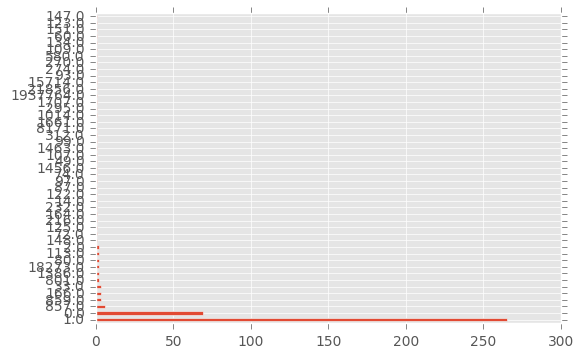

In [116]:
data.city.value_counts().plot(kind='barh')
plt.show()

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df);
plt.savefig('int_plan_and_churn.png', dpi=300);

In [ ]:
# самые самые 
# распределение алкоголиков и политики 
# распределение выкладываний - ? 
# дни рождения на временной оси - ? 


In [ ]:
# Какой-нибудь анализ этой таблички (я хз какой, лал)

## Граф эконома

Для постройки графа нам понадобятся Id, Имена и фамилии, пол, фотки

In [142]:
gr_data = data[['name','uid','sex','photo_400_orig']]

In [143]:
econom_id = list(gr_data['uid'])
econom_set = set(econom_id)

Напишем функцию, которая будет доставать друзей каждого человека и оставлять только друзей экономчан.

In [144]:
def econom_friends(econ):
    friends = set(Vk_downloader('friends.get','user_id='+str(econ))['response'])
    return(list(friends.intersection(econom_set)))
    
k = 0
eco = { }

for people in econom_id:
    time.sleep(0.4) # Нельзя делать больше трёх запросов в минуту
    try:
        eco[people] = econom_friends(people)
    # Если юзер выпилил себя из контакта, то код выше выдаст ошибку
    except Exception:
        eco[people] = [ ]
        k = k + 1 # Посчитаем таких людей

In [137]:
k  # Люди, удалившие свои странички

14

In [136]:
# По получившемуся словарю eco можно строить граф.
# Мы построим матрицу смежности вершин, чтобы раскусить невзаимные скрытия (сюрприз) 

In [ ]:
G = np.array([[ ]])

In [199]:
import networkx as nx           # Пакет для работы с графами
import matplotlib.pyplot as plt # Пакет для визуализации

# Опция для отображения картинок
%matplotlib inline 
# Размер картинок
plt.figure(figsize=(20,10))

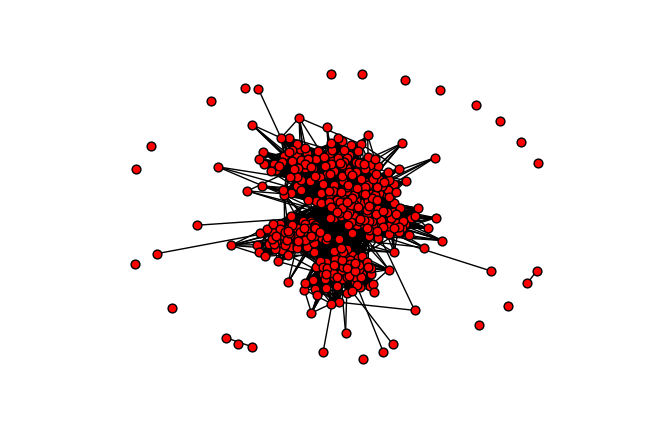

In [201]:
G = nx.from_dict_of_lists(eco)
nx.draw(G,node_size=40, cmap=True)

In [203]:
nx.is_connected(G)

False

In [204]:
sg = nx.connected_component_subgraphs(G)
[len(s) for s in sg]

[385, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [206]:
sg = list(nx.connected_component_subgraphs(G))

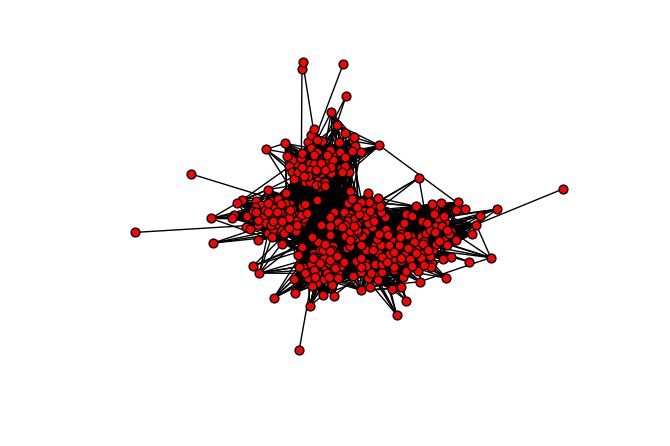

In [209]:
MG = sg[0]
nx.draw(MG,node_size=40, cmap=True)

In [210]:
nx.diameter(MG)

5

In [219]:
print('Центр графа:', nx.center(MG))
# Это что за прикол?!

Центр графа: [30419994, 20038528, 30469307, 154585217, 22096015, 49853608, 33447090, 176568505, 22163769, 246396227, 6045249, 32218565, 141126101, 6784768, 386799133, 750115, 7560796, 116576875, 18236049, 112561839, 8780561, 116977285, 150423338, 9050946, 53504993, 18805608, 28043134, 26582935, 145608859, 22333387]


In [221]:
center = nx.center(MG)

In [214]:
print('Коэффициент кластеризации', nx.average_clustering(MG))

Коэффициент кластеризации 0.559805990992195


In [217]:
lg = sg[1]

In [218]:
lg.edge

{418461892: {}}

In [349]:
import igraph as ig

In [348]:
G= {'v1': ['v2', 'v3'], 'v2': ['v1'], 'v3': ['v1', 'v4'], 'v4': ['v3']}
mvi= {'v1': 1, 'v2': 2, 'v3': 3, 'v4': 4}
g= ig.Graph(edges= [(mvi[v], mvi[a]) for v in G.keys() for a in G[v]])

Создадим свой первый граф! Он будет иметь одну вершину и называться $g$.

Проблемы с визуализацией в 3 питоне:

https://github.com/igraph/python-igraph/issues/89

https://github.com/igraph/python-igraph/issues/88

In [350]:
g = ig.Graph(1)
g

In [262]:
g.add_vertices(2)
print(g)

IGRAPH U--- 3 0 --


In [263]:
g.add_edges([(0,1), (1,2)])

In [264]:
print(g)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [269]:
g.add_edges([(2,0)])

In [270]:
g.add_vertices(3)

In [271]:
g.add_edges([(2,3),(3,4),(4,5),(5,3)])

In [272]:
print(g)

IGRAPH U--- 6 8 --
+ edges:
0--1 1--2 0--2 0--2 2--3 3--4 4--5 3--5


In [276]:
g.get_adjlist()

[[1, 2, 2], [0, 2], [0, 0, 1, 3], [2, 4, 5], [3, 5], [3, 4]]

In [285]:
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])


In [287]:
g.vs

In [301]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]


In [302]:
ig.summary(g)

IGRAPH UN-- 7 9 -- 
+ attr: age (v), gender (v), name (v), is_formal (e)


In [303]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7fcbc1b12a98>, 0, {'is_formal': False})

In [306]:
g.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7fcbc1b12a98>, 0, {'gender': 'f', 'name': 'Alice', 'age': 25})

In [309]:
g["date"] = "2009-01-10"

In [310]:
g.vs[3]["foo"] = "bar"

In [311]:
g.vs["foo"]

[None, None, None, 'bar', None, None, None]

In [312]:
del g.vs["foo"]

In [313]:
g.vs["foo"]

KeyError: 'Attribute does not exist'

In [314]:
g.degree() # vertex degree

[3, 1, 4, 3, 2, 3, 2]

In [315]:
layout = g.layout("kk")

In [319]:
ig.plot(g,layout = layout)

AttributeError: 'bytes' object has no attribute 'encode'

In [320]:
gg = ig.Graph(1)
ig.plot(gg,layout = layout)

AttributeError: 'bytes' object has no attribute 'encode'

In [346]:
g = ig.Graph(n = 12, directed=True)
g.add_edges([(1,0),(2,1), (3,2), (4,3),
             (5,1),
             (6,2), (7,6), (8,7),
             (9,0),
             (10,0), (11,10)])
g.vs["label"] = ["A", "B", "A", "B", "C", "F", "C", "B", "D", "C", "D", "F"]
ig.plot(g, layout="kk")

AttributeError: 'bytes' object has no attribute 'encode'